
Задача №2
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?
Набор Данных: https://www.kaggle.com/san-francisco/sf-restaurant-scores-lives-standard
Дополнительные требования по группам:
Для студентов группы РТ5-61Б - для пары произвольных колонок данных построить график "Jointplot".

Категориальный признак — признак, значение которого можно отнести к какой-либо группе, но порядок значений в этой группе абсолютно не важен.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer, MissingIndicator
import os

data = pd.read_csv('/kaggle/input/sf-restaurant-scores-lives-standard/restaurant-scores-lives-standard.csv')
data.shape


(53973, 23)

In [2]:
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

In [3]:
data.dtypes

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code          object
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                53973 non-null  int64  
 1   business_name              53973 non-null  object 
 2   business_address           53973 non-null  object 
 3   business_city              53973 non-null  object 
 4   business_state             53973 non-null  object 
 5   business_postal_code       52955 non-null  object 
 6   business_latitude          34417 non-null  float64
 7   business_longitude         34417 non-null  float64
 8   business_location          34417 non-null  object 
 9   business_phone_number      17035 non-null  float64
 10  inspection_id              53973 non-null  object 
 11  inspection_date            53973 non-null  object 
 12  inspection_score           40363 non-null  float64
 13  inspection_type            53973 non-null  obj

In [5]:
data.isnull().sum()

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code          1018
business_latitude            19556
business_longitude           19556
business_location            19556
business_phone_number        36938
inspection_id                    0
inspection_date                  0
inspection_score             13610
inspection_type                  0
violation_id                 12870
violation_description        12870
risk_category                12870
Neighborhoods (old)          19594
Police Districts             19594
Supervisor Districts         19594
Fire Prevention Districts    19646
Zip Codes                    19576
Analysis Neighborhoods       19594
dtype: int64

In [6]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


Удаляем колонки состаящие полностью из NaN

In [7]:

data.dropna(axis='columns',how='all', inplace=True) 

In [8]:
data.fillna({'business_postal_code':'00000',
             #'business_latitude':0,
             #'business_longitude':0,
             'business_location':'No Info',
             'business_phone_number': 0,
            # 'inspection_score':99,
            # 'violation_id':99,
            # 'violation_description':99,
            #'risk_category':99,
             #'Neighborhoods (old)':99,
             #'Police Districts':99,
             #'Supervisor Districts':99,
             #'Fire Prevention Districts':99,
             'Zip Codes':'000000',
            # 'Analysis Neighborhoods':99,
            })

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,00000,NaN,NaN,No Info,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000000,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,No Info,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,000000,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,No Info,0.000000e+00,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000000,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,No Info,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000000,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,No Info,0.000000e+00,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,89569,Blue Bottle Coffee,2 South Park,San Francisco,CA,94107,NaN,NaN,No Info,0.000000e+00,...,Routine - Unscheduled,89569_20190506_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,000000,NaN
53969,99764,POKE KANA,65 CAMBON Dr,San Francisco,CA,94132,NaN,NaN,No Info,0.000000e+00,...,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000000,NaN
53970,84541,Philz Coffee,300 Folsom St,San Francisco,CA,94105,NaN,NaN,No Info,0.000000e+00,...,Routine - Unscheduled,84541_20190506_103133,Foods not protected from contamination,Moderate Risk,NaN,NaN,NaN,NaN,000000,NaN
53971,91572,El Gran Taco Loco,4591 Mission St.,San Francisco,CA,94112,NaN,NaN,No Info,0.000000e+00,...,Routine - Unscheduled,91572_20190506_103116,Inadequate food safety knowledge or lack of ce...,Moderate Risk,NaN,NaN,NaN,NaN,000000,NaN


Возьмем колонку business_city для преобразования. Для этой колонки подойдет Label Encoding, т.к. в ней отсутствует порядок

In [9]:
# Возьмем колонку business_city для преобразования. Для этой колонки подойдет Label Encoding, т.к. в ней отсутствует порядок
cat_data = data[['business_name']]
cat_data.head()
cat_data['business_name'].unique()

array(['Cochinita #2', 'BREADBELLY', 'Great Gold Restaurant', ...,
       'LITTLE PARIS', 'Tosca Cafe', 'LITTLE SWEET'], dtype=object)

In [10]:

data.describe()

,business_id,business_latitude,business_longitude,business_phone_number,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
count,53973.000000,34417.000000,34417.000000,1.703500e+04,40363.000000,34379.000000,34379.000000,34379.000000,34327.000000,34397.000000,34379.000000
mean,47858.093084,37.749669,-122.355849,1.415543e+10,86.226792,19.048053,4.838855,7.086535,7.463687,20035.113353,19.562145
std,36582.677313,0.910580,2.950563,1.292796e+06,8.462915,11.847245,2.966111,3.144130,4.478354,13315.427650,11.629285
min,19.000000,0.000000,-122.510896,1.415020e+10,45.000000,1.000000,1.000000,1.000000,1.000000,54.000000,1.000000
25%,4920.000000,37.756231,-122.436685,1.415537e+10,81.000000,6.000000,2.000000,5.000000,3.000000,308.000000,8.000000
50%,61861.000000,37.780087,-122.419115,1.415561e+10,87.000000,19.000000,4.000000,8.000000,8.000000,28855.000000,20.000000
75%,81956.000000,37.788882,-122.407444,1.415580e+10,92.000000,28.000000,8.000000,10.000000,11.000000,28859.000000,30.000000
max,102705.000000,37.824494,0.000000,1.415988e+10,100.000000,41.000000,10.000000,11.000000,15.000000,29492.000000,41.000000


In [11]:
imp1 = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data_imp1 = imp1.fit_transform(cat_data)
data_imp1

array([['Cochinita #2'],
       ['BREADBELLY'],
       ['Great Gold Restaurant'],
       ...,
       ['Philz Coffee'],
       ['El Gran Taco Loco'],
       ['Blue Bottle Coffee']], dtype=object)

In [12]:
cat_enc = pd.DataFrame({'nbusiness_name':data_imp1.T[0]})
le = LabelEncoder()
le_data = le.fit_transform(cat_enc['nbusiness_name'])
le.classes_

array(['#1 VERJUS CAVE, #2 VERJUS', '111 Minna Gallery',
       '12 Tribes Kosher Foods', ..., 'Zzan', 'iNoodles', 'vive la tarte'],
      dtype=object)

In [13]:
le_data

array([1181,  500, 1972, ..., 3755, 1522,  676])

In [14]:
np.unique(le_data)

array([   0,    1,    2, ..., 5569, 5570, 5571])

In [15]:
le.inverse_transform([i for i in range(0, 24)])

array(['#1 VERJUS CAVE, #2 VERJUS', '111 Minna Gallery',
       '12 Tribes Kosher Foods', '1428 Haight', '15 Romolo',
       '1601 Bar & Kitchen', '1608 Bistro', '1760', '17th & Noe Market',
       '18 Reasons', '18th Street Commissary', '19TH AVE CHEVRON',
       '19th Ave Shell', '20 Spot Mission, LLC', '20th Century Cafe',
       '21 Taste House', '21ST AMENDMENT BREWERY CAFE',
       '2227 Irving Seafood Market Inc', '23RD & GUERRERO LIQUOR STORE',
       '24 HR CONVENIENCE MKT', '24TH STREET CHEESE COMPANY',
       '24th and Folsom Eatery', '25TH IRVING MARKET',
       '260 Golden Gate Family Residence'], dtype=object)

Для преобразования колонки 'risk_category' воспользуемся методом one hot encoding:

In [16]:
cat_data = data[['risk_category']]
cat_data['risk_category'].unique()

array([nan, 'Moderate Risk', 'High Risk', 'Low Risk'], dtype=object)

In [17]:
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data_imp = imp.fit_transform(cat_data)
data_imp

array([['Low Risk'],
       ['Moderate Risk'],
       ['Low Risk'],
       ...,
       ['Moderate Risk'],
       ['Moderate Risk'],
       ['Low Risk']], dtype=object)

In [18]:
cat_enc = pd.DataFrame({'nrisk_category':data_imp.T[0]})
cat_enc

,nrisk_category
0,Low Risk
1,Moderate Risk
2,Low Risk
3,Low Risk
4,High Risk
...,...
53968,Moderate Risk
53969,Low Risk
53970,Moderate Risk
53971,Moderate Risk


In [19]:
pd.get_dummies(cat_enc).head()

,nrisk_category_High Risk,nrisk_category_Low Risk,nrisk_category_Moderate Risk
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,1,0,0


In [20]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['nrisk_category']])
cat_enc_ohe

<53973x3 sparse matrix of type '<class 'numpy.float64'>'
	with 53973 stored elements in Compressed Sparse Row format>

In [21]:
cat_enc_ohe.todense()[100:110]

matrix([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])

Построим график Jointplot
График будем строить для колонок 'business_name' (Название бизнеса) и 'risk_category' (Категория риска)


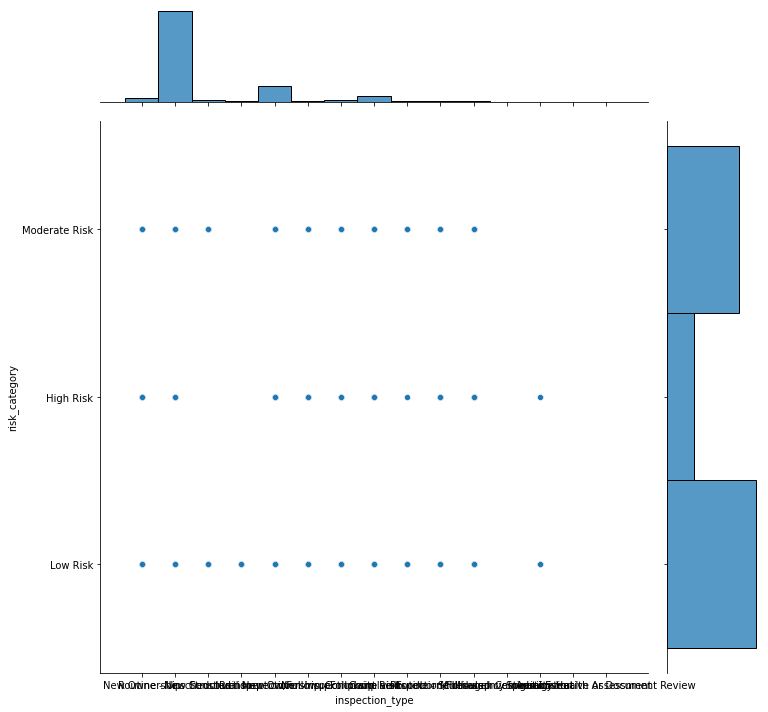

In [22]:
import seaborn as sns
sns.jointplot(x = 'inspection_type', height = 10, y = 'risk_category', data = data)